In [5]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
import math
from matplotlib.patches import Circle
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.manifold import MDS

In [6]:
# Load Dataset

dataset = pd.read_csv(r"dataset.csv")
dataset

,date,COVID,shoot+to+kill,oust,public+transportation,mental+health,pwd,quarantine,social amelioration,subpoena,...,lockdown,rapid testing,mass+testing,testing,pandemic,corona virus,coronavirus,karapatan,karapatang+pantao,human+rights
0,1/1/2020,0,85,0,55,29,48,1,0,0,...,0,0,100,18,0,0,0,6,8,36
1,1/2/2020,0,88,0,60,45,76,1,0,23,...,0,0,30,53,0,0,0,12,0,45
2,1/3/2020,0,91,0,59,39,8,1,0,0,...,0,0,25,41,0,0,0,18,6,35
3,1/4/2020,0,88,0,56,41,48,2,0,0,...,0,0,54,21,0,0,0,19,5,38
4,1/5/2020,0,92,0,52,53,67,1,0,0,...,0,0,88,33,0,0,0,40,8,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,3/10/2020,57,98,9,71,77,36,14,0,39,...,16,0,48,100,9,48,51,32,23,78
70,3/11/2020,62,96,0,82,88,61,19,0,39,...,17,0,30,94,47,48,51,32,24,81
71,3/12/2020,100,97,18,100,94,43,82,0,0,...,100,0,39,98,100,69,78,30,23,70
72,3/13/2020,86,98,0,79,77,15,100,0,21,...,48,0,39,98,35,64,67,28,16,63


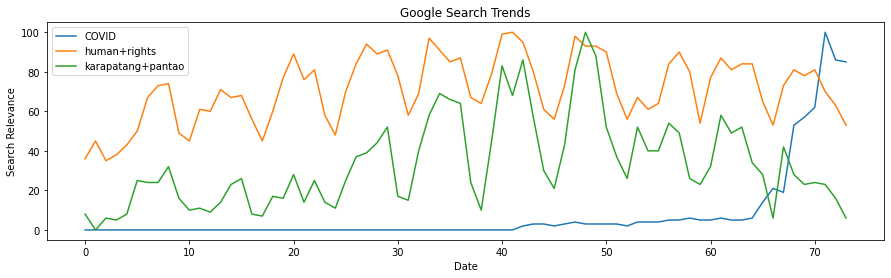

In [7]:
# Plot time-series
plt.figure(figsize=(15,4))
plt.plot(dataset[["COVID", "human+rights", "karapatang+pantao"]])
plt.title("Google Search Trends")
plt.xlabel("Date")
plt.ylabel("Search Relevance")
plt.legend(["COVID", "human+rights", "karapatang+pantao"])
plt.show()

In [9]:
# Calculate correlations
dataset_correlation = dataset.corr()
dataset_correlation.to_csv('correlation_table.csv')    
dataset_correlation

,COVID,shoot+to+kill,oust,public+transportation,mental+health,pwd,quarantine,social amelioration,subpoena,arrest,...,lockdown,rapid testing,mass+testing,testing,pandemic,corona virus,coronavirus,karapatan,karapatang+pantao,human+rights
COVID,1.000000,0.307336,0.080356,0.428203,0.343528,-0.235125,0.872841,-0.045259,-0.034312,0.180229,...,0.854410,-0.041338,-0.063894,0.420140,0.820104,0.520000,0.564066,-0.215318,-0.158259,-0.026236
shoot+to+kill,0.307336,1.000000,-0.177862,0.599141,0.798739,0.208593,0.251499,0.069149,0.127448,0.282830,...,0.207899,0.038814,-0.289763,0.738560,0.203633,0.119844,0.118618,0.653242,0.617453,0.705992
oust,0.080356,-0.177862,1.000000,0.068632,-0.041603,-0.187018,0.135602,-0.041466,-0.108708,0.132542,...,0.120038,0.054606,0.034931,-0.064235,0.114264,0.341544,0.279080,-0.149859,-0.079456,-0.054048
public+transportation,0.428203,0.599141,0.068632,1.000000,0.662477,0.009933,0.354529,0.027591,0.159617,0.189424,...,0.401650,0.030192,-0.427450,0.611420,0.429032,0.385335,0.379087,0.385933,0.411471,0.554597
mental+health,0.343528,0.798739,-0.041603,0.662477,1.000000,0.210038,0.279649,0.223917,0.317691,0.179042,...,0.279544,0.038669,-0.395359,0.803156,0.314437,0.473068,0.463425,0.630323,0.581813,0.813218
pwd,-0.235125,0.208593,-0.187018,0.009933,0.210038,1.000000,-0.284665,-0.165292,0.084924,-0.096657,...,-0.199800,0.188802,-0.125521,0.230675,-0.140924,-0.313824,-0.307464,0.260358,0.155580,0.205752
quarantine,0.872841,0.251499,0.135602,0.354529,0.279649,-0.284665,1.000000,0.007590,-0.078410,0.202489,...,0.846177,-0.006804,-0.066253,0.333454,0.745413,0.551963,0.574480,-0.154983,-0.108525,-0.030244
social amelioration,-0.045259,0.069149,-0.041466,0.027591,0.223917,-0.165292,0.007590,1.000000,0.192865,0.064805,...,-0.010667,-0.019479,-0.039493,0.171247,-0.007129,0.458091,0.436453,0.075764,0.096835,0.140530
subpoena,-0.034312,0.127448,-0.108708,0.159617,0.317691,0.084924,-0.078410,0.192865,1.000000,-0.086693,...,-0.105044,-0.175919,-0.188572,0.226590,-0.075865,0.249556,0.227454,0.195928,0.230937,0.272969
arrest,0.180229,0.282830,0.132542,0.189424,0.179042,-0.096657,0.202489,0.064805,-0.086693,1.000000,...,0.123885,-0.063990,-0.074730,0.058932,0.099385,0.099987,0.112569,0.016342,0.148584,0.106818


In [10]:
# Rescale Correlation to distances

def rescale_corr(x):
    return 2 - x

dataset_rescale = dataset_correlation.apply(rescale_corr)
dataset_rescale


,COVID,shoot+to+kill,oust,public+transportation,mental+health,pwd,quarantine,social amelioration,subpoena,arrest,...,lockdown,rapid testing,mass+testing,testing,pandemic,corona virus,coronavirus,karapatan,karapatang+pantao,human+rights
COVID,1.000000,1.692664,1.919644,1.571797,1.656472,2.235125,1.127159,2.045259,2.034312,1.819771,...,1.145590,2.041338,2.063894,1.579860,1.179896,1.480000,1.435934,2.215318,2.158259,2.026236
shoot+to+kill,1.692664,1.000000,2.177862,1.400859,1.201261,1.791407,1.748501,1.930851,1.872552,1.717170,...,1.792101,1.961186,2.289763,1.261440,1.796367,1.880156,1.881382,1.346758,1.382547,1.294008
oust,1.919644,2.177862,1.000000,1.931368,2.041603,2.187018,1.864398,2.041466,2.108708,1.867458,...,1.879962,1.945394,1.965069,2.064235,1.885736,1.658456,1.720920,2.149859,2.079456,2.054048
public+transportation,1.571797,1.400859,1.931368,1.000000,1.337523,1.990067,1.645471,1.972409,1.840383,1.810576,...,1.598350,1.969808,2.427450,1.388580,1.570968,1.614665,1.620913,1.614067,1.588529,1.445403
mental+health,1.656472,1.201261,2.041603,1.337523,1.000000,1.789962,1.720351,1.776083,1.682309,1.820958,...,1.720456,1.961331,2.395359,1.196844,1.685563,1.526932,1.536575,1.369677,1.418187,1.186782
pwd,2.235125,1.791407,2.187018,1.990067,1.789962,1.000000,2.284665,2.165292,1.915076,2.096657,...,2.199800,1.811198,2.125521,1.769325,2.140924,2.313824,2.307464,1.739642,1.844420,1.794248
quarantine,1.127159,1.748501,1.864398,1.645471,1.720351,2.284665,1.000000,1.992410,2.078410,1.797511,...,1.153823,2.006804,2.066253,1.666546,1.254587,1.448037,1.425520,2.154983,2.108525,2.030244
social amelioration,2.045259,1.930851,2.041466,1.972409,1.776083,2.165292,1.992410,1.000000,1.807135,1.935195,...,2.010667,2.019479,2.039493,1.828753,2.007129,1.541909,1.563547,1.924236,1.903165,1.859470
subpoena,2.034312,1.872552,2.108708,1.840383,1.682309,1.915076,2.078410,1.807135,1.000000,2.086693,...,2.105044,2.175919,2.188572,1.773410,2.075865,1.750444,1.772546,1.804072,1.769063,1.727031
arrest,1.819771,1.717170,1.867458,1.810576,1.820958,2.096657,1.797511,1.935195,2.086693,1.000000,...,1.876115,2.063990,2.074730,1.941068,1.900615,1.900013,1.887431,1.983658,1.851416,1.893182


In [11]:
# Multi-dimensional Scaling

md = MDS(n_components = 2, n_init = 1, dissimilarity = 'precomputed')

def create_mds(x):
    df1 = md.fit_transform(x)
    df2 = pd.DataFrame(df1, columns = ['x_axis', 'y_axis'])
    df3 = pd.DataFrame(x.index, columns=['label'])
    df4 = df2.join(df3, how='inner')
    return df4

In [20]:
# Generate MDS Coordinates

dataset_mds = create_mds(dataset_rescale)
dataset_mds

,x_axis,y_axis,label
0,-1.404101,-0.261350,COVID
1,0.185442,-0.478402,shoot+to+kill
2,1.493094,0.274358,oust
3,-0.444925,-0.819771,public+transportation
4,-0.032673,-0.639043,mental+health
5,0.338738,0.892353,pwd
6,-1.393885,-0.407128,quarantine
7,-0.847669,0.660882,social amelioration
8,0.486406,-1.449658,subpoena
9,-0.272976,0.754285,arrest


In [13]:
# Plot MDS Coordinates

def mds_map(x):
    fig = plt.gcf()
    fig.set_size_inches(16, 10.5)
    plt.scatter(x.x_axis, x.y_axis, 150)
    for i, txt in enumerate(x.label):
        plt.annotate(txt, (x.x_axis[i], x.y_axis[i]))

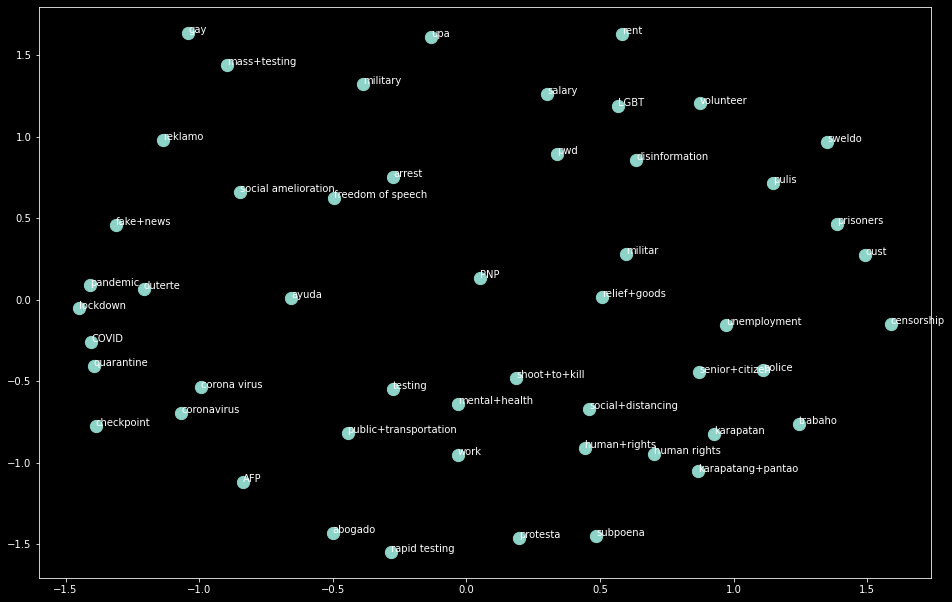

In [21]:
dataset_map = mds_map(dataset_mds)
dataset_map

In [22]:
# KMeans Clustering

def getscore(x, y):
    km = KMeans(n_clusters=x)
    z = y.drop(['label'], axis=1)
    km.fit(z)
    return 'Score for ' + str(x) + ' clusters: ' + str(silhouette_score(km.fit_transform(z), km.labels_))

def getscores(x):
    response = []
    for i in range(2,11):
        response.append(getscore(i, x))
    return pd.DataFrame(response, columns=['outcomes'])

In [23]:
# K-Means Silhouette Score

dataset_mds.drop(["label"], axis=1)
getscores(dataset_mds)

,outcomes
0,Score for 2 clusters: 0.4767034286632703
1,Score for 3 clusters: 0.430567125534258
2,Score for 4 clusters: 0.4071175616814961
3,Score for 5 clusters: 0.38010991024868224
4,Score for 6 clusters: 0.3753438477833091
5,Score for 7 clusters: 0.3895242446203789
6,Score for 8 clusters: 0.3677096976901548
7,Score for 9 clusters: 0.33839897305945654
8,Score for 10 clusters: 0.4137950495616492


In [25]:
# Get Cluster Membership
km = KMeans(n_clusters = 9)
km.fit(dataset_mds.drop(["label"], axis=1))
clusters = pd.DataFrame(km.predict(dataset_mds.drop(["label"], axis=1)))
clusters.columns = ["cluster"]
dataset_clustered = dataset_mds.join(clusters)
dataset_clustered.sort_values(by='cluster')

,x_axis,y_axis,label,cluster
0,-1.404101,-0.261350,COVID,0
47,-1.067363,-0.694285,coronavirus,0
46,-0.991253,-0.538791,corona virus,0
45,-1.409213,0.086175,pandemic,0
6,-1.393885,-0.407128,quarantine,0
41,-1.448972,-0.054338,lockdown,0
13,-1.207811,0.065027,duterte,0
39,-1.386047,-0.773287,checkpoint,0
29,0.508129,0.014603,relief+goods,1
33,0.051487,0.132281,PNP,1


In [36]:
# Galaxy Map

def draw_galaxy(x, y, x1, x2, y1, y2):
    z = x.drop(['label'], axis = 1)
    fig = plt.gcf()
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 10.5)
    plt.style.use('dark_background')
    ax.set_facecolor('black')
    km = KMeans(n_clusters=y)
    km.fit(z)
    toutput = km.predict(z)
    toutput1 = pd.DataFrame(toutput, columns = ['cluster'])
    toutput2 = x.join(toutput1, how='inner')
    tds0 = toutput2[toutput2.cluster==0]
    tds1 = toutput2[toutput2.cluster==1]
    tds2 = toutput2[toutput2.cluster==2]
    tds3 = toutput2[toutput2.cluster==3]
    tds4 = toutput2[toutput2.cluster==4]
    tds5 = toutput2[toutput2.cluster==5]
    tds6 = toutput2[toutput2.cluster==6]
    tds7 = toutput2[toutput2.cluster==7]
    tds8 = toutput2[toutput2.cluster==8]
    tds9 = toutput2[toutput2.cluster==9]
    tdsc = pd.DataFrame(km.cluster_centers_, columns = ['x_axis', 'y_axis'])
    plt.scatter(tds0.x_axis, tds0.y_axis, 150)
    plt.scatter(tds1.x_axis, tds1.y_axis, 150)
    plt.scatter(tds2.x_axis, tds2.y_axis, 150)
    plt.scatter(tds3.x_axis, tds3.y_axis, 150)
    plt.scatter(tds4.x_axis, tds4.y_axis, 150)
    plt.scatter(tds5.x_axis, tds5.y_axis, 150)
    plt.scatter(tds6.x_axis, tds6.y_axis, 150)
    plt.scatter(tds7.x_axis, tds7.y_axis, 150)
    plt.scatter(tds8.x_axis, tds8.y_axis, 150)
    plt.scatter(tds9.x_axis, tds9.y_axis, 150)
    for i, txt in enumerate(x.label):
        plt.annotate(txt, (x.x_axis[i], x.y_axis[i]))
    plt.axis([x1, x2, y1, y2])
    #circle = Circle((0,0), 0.05, color='gray', fill=False)
    #circle1 = Circle((0,0), 0.1, color='gray', fill=False)
    #circle2 = Circle((0,0), 0.15, color='gray', fill=False)
    #ax.add_artist(circle)
    #ax.add_artist(circle1)
    #ax.add_artist(circle2)

<Figure size 432x288 with 0 Axes>

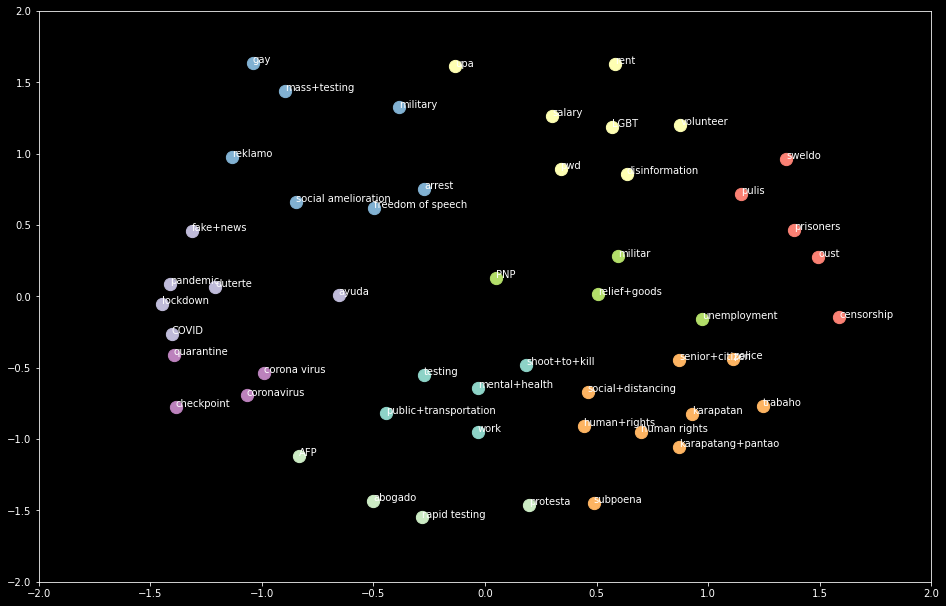

In [37]:
draw_galaxy(dataset_mds, 9, -2, 2, -2, 2)